## 1) Imports

In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
from scipy.stats import ttest_ind, levene, shapiro
from statsmodels.stats.proportion import proportions_ztest
import statsmodels.api         as     sm
from   statsmodels.formula.api import ols

## 2) Read the data

In [2]:
data = pd.read_csv("insurance.csv")
data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

## 3) a) Shape of data

In [5]:
data.shape

(1338, 7)

## 3) b) Data type of each value

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


## 3) c) Checking for presence of missing values

The output above suggests there aren't any non-null values.

The output below confirms thre aren't any null values for any of the attributes.

In [17]:
data.isnull().any()

age         False
sex         False
bmi         False
children    False
smoker      False
region      False
charges     False
dtype: bool

In [15]:
data.isnull().sum().sum() #number of nulls

0

## 3) d) 5 points summary of numerical attributes

In [4]:
data.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

## 3) e) Distribution of ‘bmi’, ‘age’ and ‘charges’ columns

/Users/Gesi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


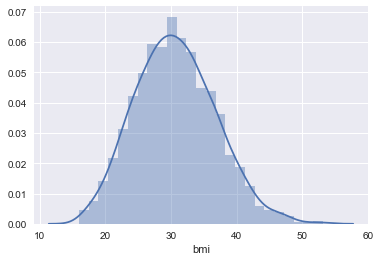

In [18]:
sns.distplot(data['bmi']) 

The distribution of the 'bmi' attribute looks like a normal distribution.

/Users/Gesi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


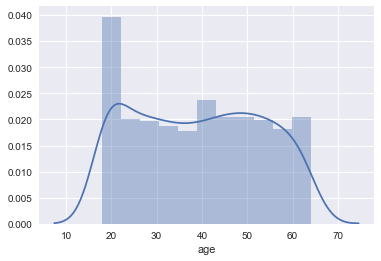

In [19]:
sns.distplot(data['age'])

The distribution of the 'age' attribute does not look like a normal distribution.

/Users/Gesi/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


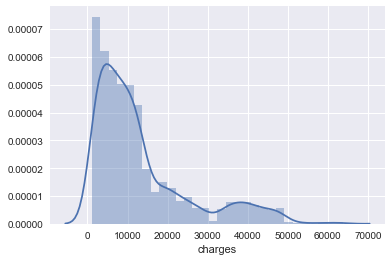

In [21]:
sns.distplot(data['charges'])

The distribution of the 'charges' attribute does not look like a normal distribution.

## 3) f) Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

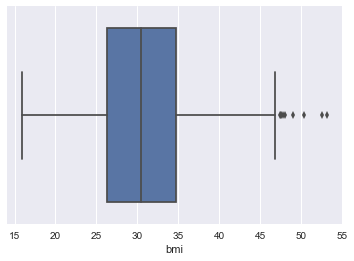

In [28]:
sns.boxplot(data['bmi'])

The distribution of the 'bmi' attribute is not very skewed, but has a few outliers to the right. This fits with the distribution plot rendered previously.

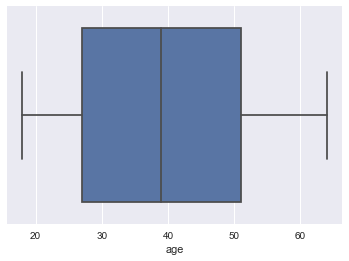

In [29]:
sns.boxplot(data['age'])

The distribution of the age attribute is not very skewed. 

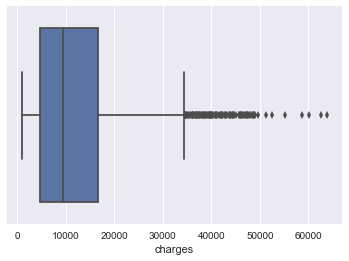

In [30]:
sns.boxplot(data['charges'])

The distribution of the charges attributes is right-skewed with many outliers to the right.

## 3) g) Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges' columns

As the boxplots above show, 'bmi' has a few outliers to the right, 'age' has no outliers and 'charges' has many outliers to the right. 

## 3) h) Distribution of categorical columns (include children: sex, children, region, smoker) 

### Distribution of gender

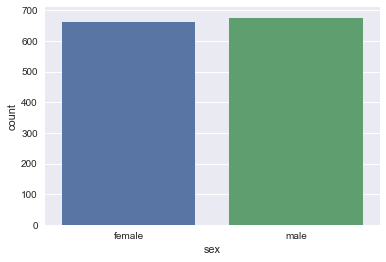

In [159]:
sns.countplot(data['sex'])

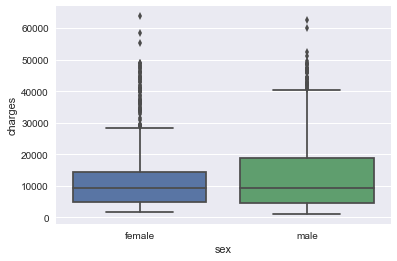

In [147]:
sns.boxplot(data['sex'],data['charges'])

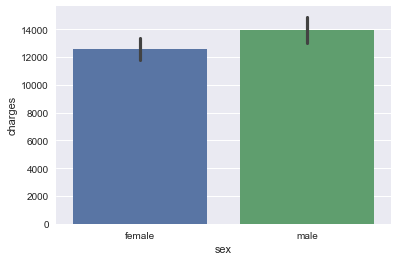

In [160]:
sns.barplot(data['sex'],data['charges'])

### Distribution of number of children

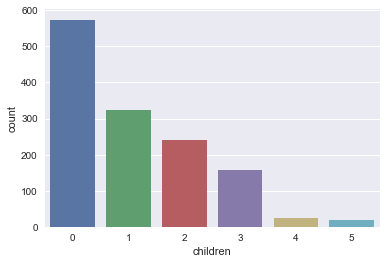

In [161]:
sns.countplot(data['children'].astype('category'))

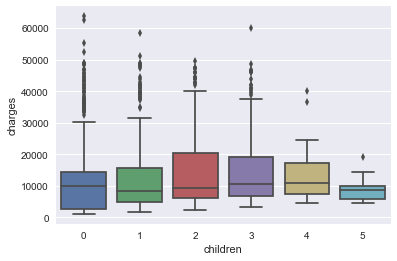

In [148]:
sns.boxplot(data['children'].astype('category'),data['charges'])

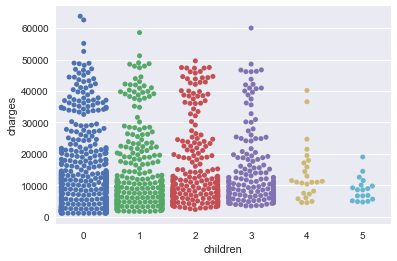

In [165]:
sns.swarmplot(data['children'].astype('category'),data['charges'])

### Distribution of smokers vs non smokers

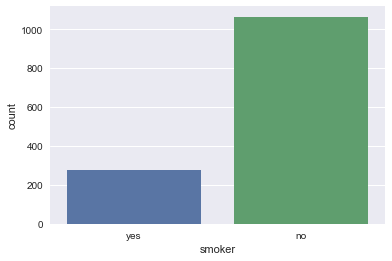

In [162]:
sns.countplot(data['smoker'])

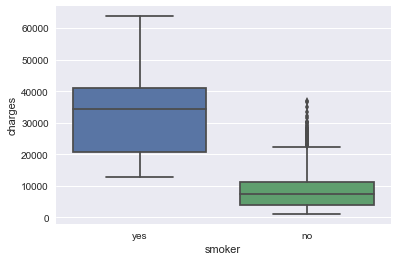

In [149]:
sns.boxplot(data['smoker'],data['charges'])

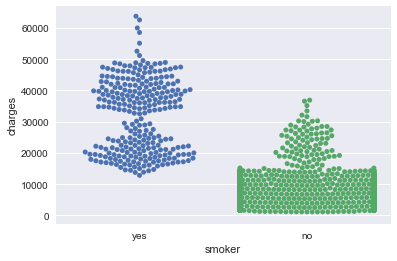

In [169]:
sns.swarmplot(data['smoker'],data['charges'])

### Distribution of Regions

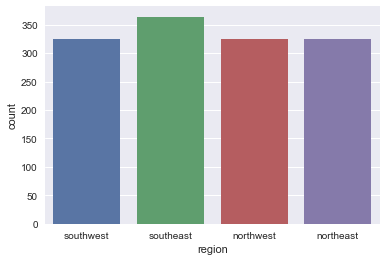

In [170]:
sns.countplot(data['region'])

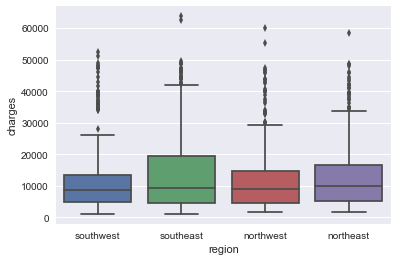

In [150]:
sns.boxplot(data['region'],data['charges'])

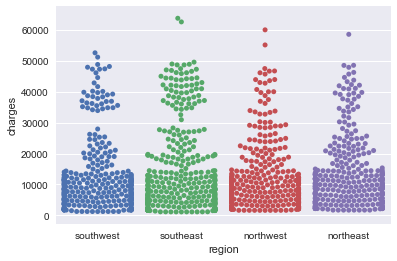

In [171]:
sns.swarmplot(data['region'],data['charges'])

### Distribution of gender against charges colored by smoker/non-smoker

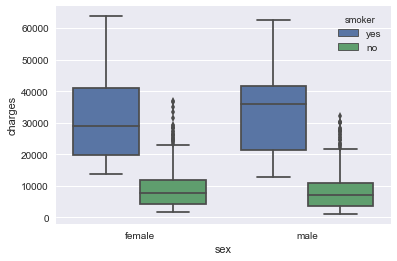

In [151]:
sns.boxplot(x='sex',y='charges', hue='smoker', data=data)

### Distribution of region against charges colored by smoker/non-smoker

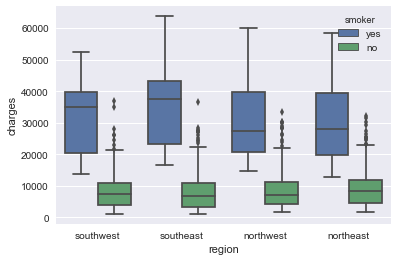

In [152]:
sns.boxplot(x='region',y='charges', hue='smoker', data=data)

### Distribution of number of children against charges colored by gender

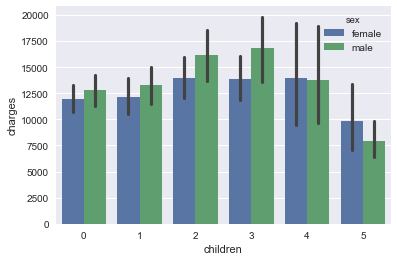

In [153]:
sns.barplot(data['children'].astype('category'),y='charges', hue='sex', data=data)

### Distribution of smoker/non-smoker against charges and gender per region.

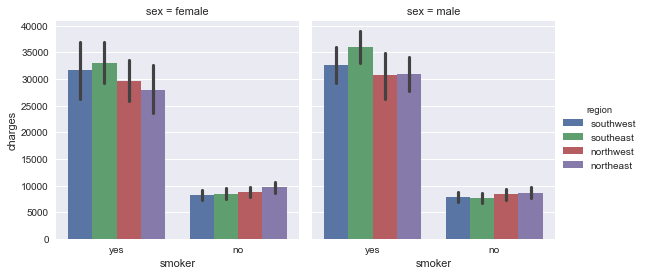

In [173]:
sns.factorplot(x='smoker', y='charges', col='sex', hue='region', data=data, kind='bar')

## 3) i) Pair plot that includes all the columns of the data frame

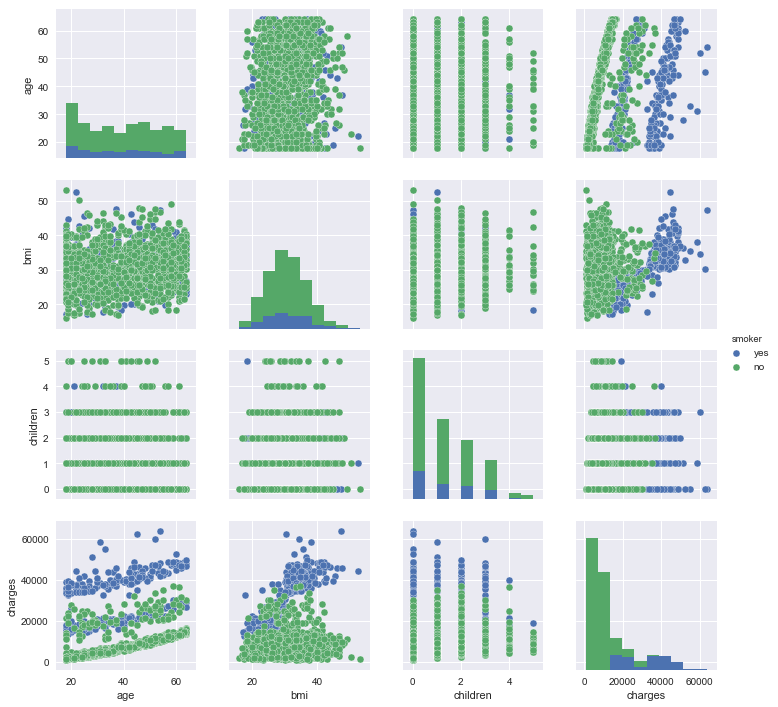

In [155]:
sns.pairplot(data, hue='smoker',diag_kind='hist' )

## 4) a) Do charges of people who smoke differ significantly from the people who don't?

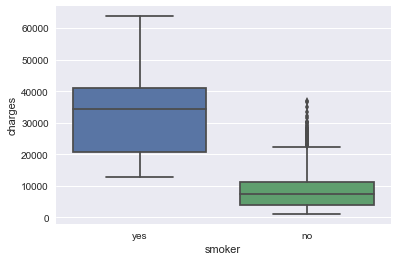

In [146]:
sns.boxplot(x='smoker',y='charges', data=data)

This can be tested using two sample t-test of mean and assumes the samples are independant. <br>
$H_0$: mean of charges for smokers = mean of charges for non-smoker <br>
$H_a$: mean of charges for smokers != mean of charges for non-smoker<br>
$\alpha$ = 0.05

In [157]:
smokers_charges = data[data['smoker']=='yes']['charges']
nonsmokers_charges = data[data['smoker']=='no']['charges']      

In [158]:
t_statistic, p_value = ttest_ind(smokers_charges, nonsmokers_charges)
print(t_statistic, p_value)

46.664921172723716 8.271435842177219e-283


As p_value is smaller than $\alpha$, we can reject $H_0$ and deduce that charges of people who smoke do differ significantly from those who don't.

## 4) b) Does bmi of males differ significantly from that of females?

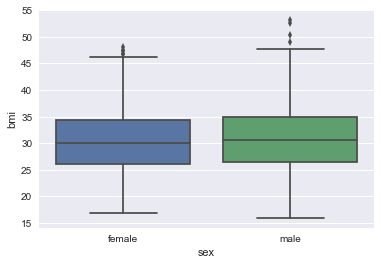

In [144]:
sns.boxplot(x='sex',y='bmi', data=data)

This can be tested using two sample t-test of mean and assumes the samples are independant.<br>
$H_0$: mean of bmi for males = mean of bmi for females<br>
$H_a$: mean of bmi for males != mean of bmi for females<br>
$\alpha$ = 0.05

In [77]:
male_bmi = data[data['sex']=='male']['bmi']
female_bmi = data[data['sex']=='female']['bmi']                 

In [78]:
t_statistic, p_value = ttest_ind(male_bmi, female_bmi)
print(t_statistic, p_value)

1.696752635752224 0.08997637178984932


As p_value is larger than $\alpha$, we fail to reject $H_0$ and cannot say that the bmi of males differ significantly from that of females.

## 4) c) Is the proportion of smokers significantly different in different genders?

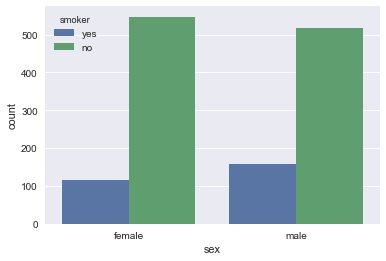

In [126]:
sns.countplot(x='sex', hue='smoker', data=data)

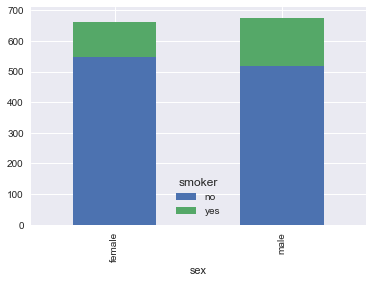

In [139]:
n_sex_smoker = data.groupby(['sex', 'smoker']).size().reset_index().pivot(columns='smoker', index='sex', values=0)
n_sex_smoker.plot(kind='bar', stacked='True')

This can be tested using two sample z-proportion test.<br>
$H_0$: the proportion of female smokers = the proportion of male smokers<br>
$H_a$: the proportion of female smokers != the proportion of male smokers<br>
$\alpha$ = 0.05

In [87]:
females = data[data['sex']=='female']
males = data[data['sex']=='male']
female_smokers = females[females['smoker']=='yes']
male_smokers = males[males['smoker']=='yes']

In [121]:
n_females = len(females)
n_males = len(males)
n_female_smokers = len(female_smokers)
n_male_smokers= len(male_smokers)
print([n_female_smokers, n_male_smokers] , [n_females, n_males])

[115, 159] [662, 676]


In [122]:
z_statistic, p_value = proportions_ztest([n_female_smokers, n_male_smokers] , [n_females, n_males])
print(z_statistic, p_value)

-2.7867402154855503 0.005324114164320532


As p_value is larger than $\alpha$, we can reject $H_0$ and say that the proportion of smokers in male and female are significantly different.

## 4) d) Is the distribution of bmi across women with no children, one child and two children, the same ?

We want to assume that the distribution of bmi across women with 0, 1 and 2 children has the same variance, in order to use ANOVA to verify if they have the same mean as well. So first:<br>
$H_0$: Variance of bmi across women with 0, 1 and 2 children is the same<br>
$H_a$: Variance of bmi across women with 0, 1 and 2 children is not the same<br>
$\alpha$ = 0.05

In [96]:
bmi_f_0 = data[(data['sex']=='female') & (data['children']==0)]['bmi']
bmi_f_1 = data[(data['sex']=='female') & (data['children']==1)]['bmi']
bmi_f_2 = data[(data['sex']=='female') & (data['children']==2)]['bmi']

In [98]:
statistics, p_value = levene(bmi_f_0, bmi_f_1, bmi_f_2)
print(statistics, p_value)

0.9433311607108589 0.3899432394522804


As p_value is greater than $\alpha$, we fail to reject $H_0$ and therefore, can assume the 3 distributions have the same variance. 

Now we want to verify that the 3 distributions are normal.<br>
$H_0$: Distributions of bmi across women with 0, 1 and 2 children are normal (this is really 3 separeate $H_0$'s)<br>
$H_a$: Distributions of bmi across women with 0, 1 and 2 children are not normal (this is really 3 separeate $H_a$'s)<br>
$\alpha$ = 0.05

In [103]:
statistics_0, p_value_0 = shapiro(bmi_f_0)
print(statistics_0, p_value_0)
statistics_1, p_value_1 = shapiro(bmi_f_1)
print(statistics_1, p_value_1)
statistics_2, p_value_2 = shapiro(bmi_f_2)
print(statistics_2, p_value_2)

0.9896312355995178 0.03757598251104355
0.9921025037765503 0.5361911654472351
0.9860439300537109 0.2596229910850525


As all the p_values above are greater than $\alpha$, we fail to reject the 3 $H_0$'s abov and can assume the three distributions are normal.

Now we can use ANOVA test to see if the 3 distributions have the same mean or not:<br>
$H_0$: $\mu_0$ (mean of bmi for women with 0 children) = $\mu_1$ (mean of bmi for women with 1 child) = $\mu_2$ (mean of bmi for women with 2 children) <br>
$H_a$: At least one pair of $\mu_0$, $\mu_1$ and $\mu_2$ are not equal<br>
$\alpha$ = 0.05

In [109]:
bmi_children = pd.DataFrame()
bmi_0 = pd.DataFrame({'n_child':'0','bmi':bmi_f_0})
bmi_1 = pd.DataFrame({'n_child':'1','bmi':bmi_f_1})
bmi_2 = pd.DataFrame({'n_child':'2','bmi':bmi_f_2})

bmi_children = bmi_children.append(bmi_0).append(bmi_1).append(bmi_2)

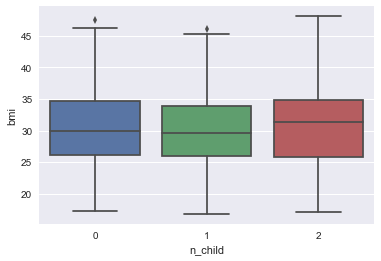

In [111]:
sns.boxplot(x = "n_child", y = "bmi", data = bmi_children)


In [112]:
mod = ols('bmi ~ n_child', data = bmi_children).fit()
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                sum_sq     df         F    PR(>F)
n_child      24.590123    2.0  0.334472  0.715858
Residual  20695.661583  563.0       NaN       NaN


As p_value (0.716) is greater than $\alpha$, we fail to reject $H_0$ and can assume that the distribution of bmi across women with 0, 1 and 2 children is the same. 

## Conclusion

1. From the plots and the hypothesis testing in 4)a) it is clear that smoking impacts the charges significantly. 
2. While the median for the charges of male and female clients is very similar, the male clients have a wider IQR and in particular a higher Q3 which with the number of males and females being in a close range, suggests a bigger propoertion of male clients have higher charges.
3. From the plots it doesn't appear that the number of chidren is directly affecting the costs.
4. The cost across the regions seem to be in a similar range, except for the south east which has a higher Q3.
5. From the pair plot we can see that there isn't a direct relation between bmi and the charges for the clients.
6. From the pair plot we can see that the charges do increase with the age of the client.   